In [115]:
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
from demo import Demo, Frames
ms_per_tick = 1000 / 64
sec_per_tick = 1 / 64
GRENADES = ["Molotov", "Smoke Grenade", "HE Grenade", "Incendiary Grenade", "Flashbang", "Decoy Grenade"]

In [103]:
demo = Demo.load("demos/003539831729474764830_0420161581.dem", parse_rate=1)

demo_my = Demo.load("demos/match730_003542714992560177238_0804145047_183.dem", parse_rate=1)

In [ ]:
rounds = Frames.from_demo(demo)

In [123]:
replay_my = demo_my.frames
replay = demo.frames
replay["name"].unique()

array(['Shiar112', 'wdnmd', 'Steupid', 'sh1ro', 'Serendipity',
       '她与残局皆遗憾，一比十五我开转', '天皓', 'SHELLY', 'zako', 'John Ripper'],
      dtype=object)

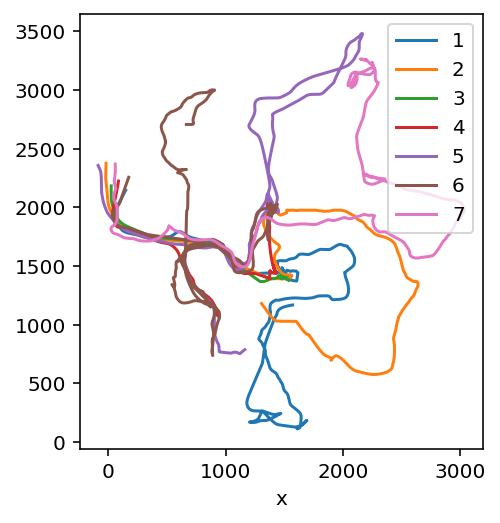

In [29]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

for round_num in range(1, 8):
    round = replay[(replay["name"] == "sh1ro") & (replay["roundNum"] == round_num)]
    round = round[["x", "y"]]
    round.x = round.x + 1500
    round.y = round.y + 1500
    round.columns = ["x", f"{round_num}"]
    round.plot(x="x", y=f"{round_num}", ax=ax)

In [47]:
player_john = replay[replay["name"] == "John Ripper"]
# player_john = player_john[player_john["roundNum"] == 1]

player_john["viewX"] = (player_john["viewX"] + 180) % 360
player_john["viewY"] = (player_john["viewY"] + 180) % 360

player_sh1ro = replay[replay["name"] == "sh1ro"]
# player_john = player_john[player_john["roundNum"] == 1]

player_sh1ro["viewX"] = (player_sh1ro["viewX"] + 180) % 360
player_sh1ro["viewY"] = (player_sh1ro["viewY"] + 180) % 360

<AxesSubplot:xlabel='tick'>

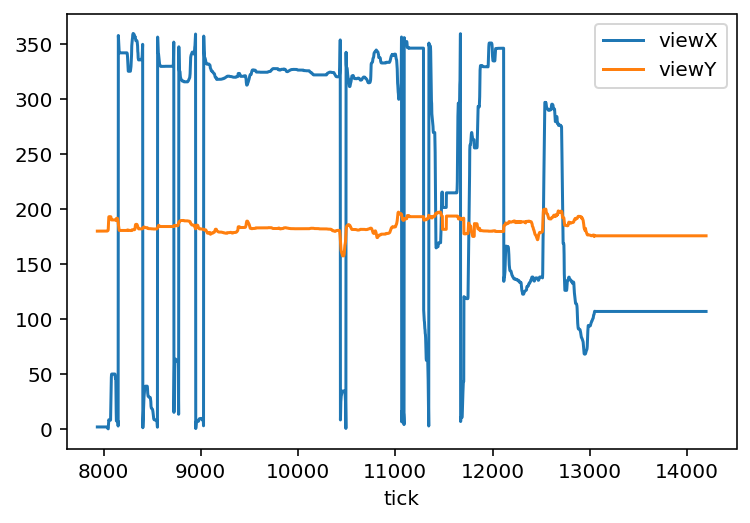

In [38]:
player_john.plot(x="tick", y=["viewX", "viewY"])

<AxesSubplot:ylabel='Frequency'>

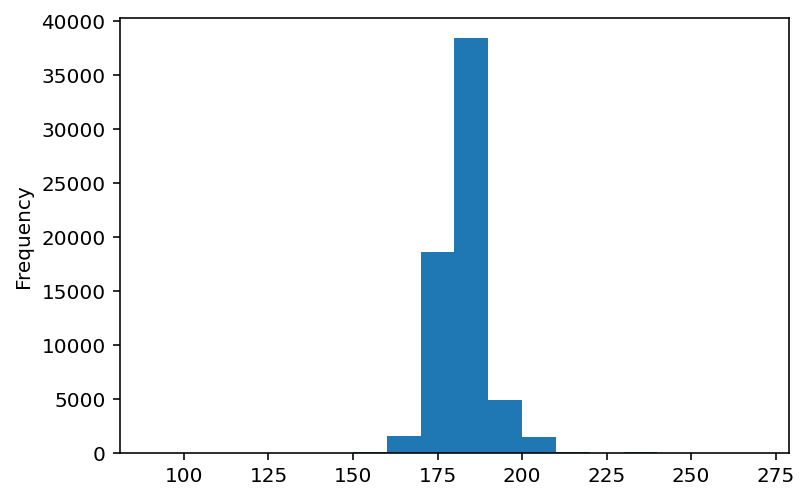

In [42]:
player_john["viewY"].plot.hist(bins=18, range=[90, 270])

<AxesSubplot:ylabel='Frequency'>

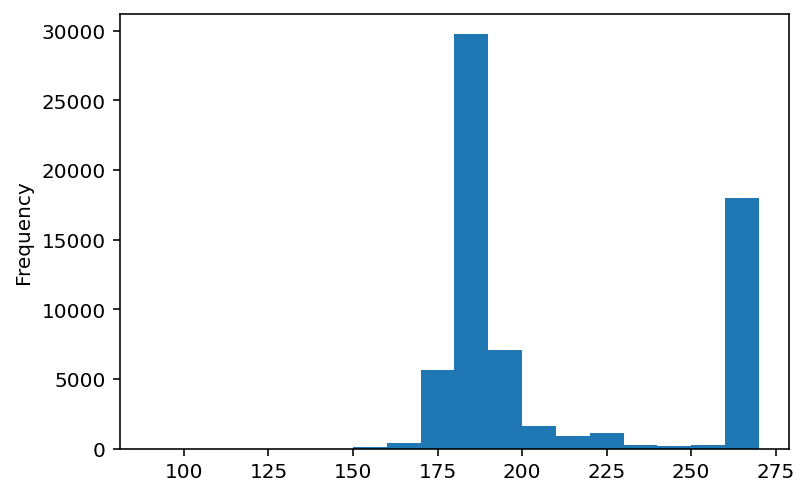

In [49]:
player_sh1ro["viewY"].plot.hist(bins=18, range=[90, 270])

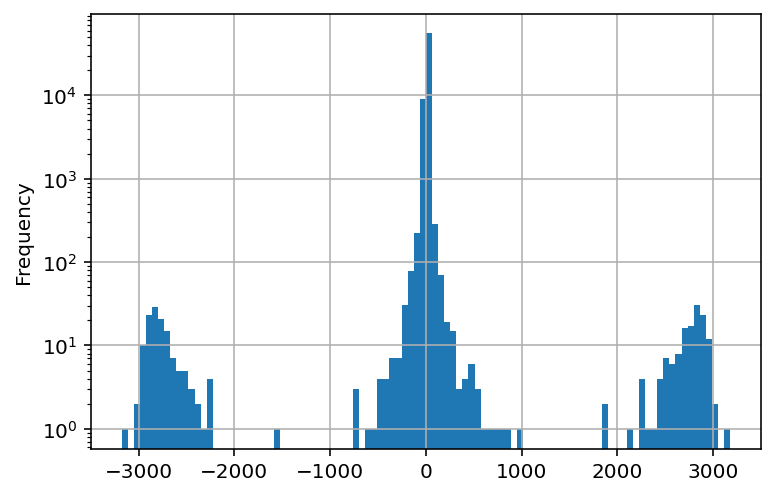

In [63]:
time = player_sh1ro["tick"] * sec_per_tick
player_sh1ro["dViewY"] = player_sh1ro["viewY"].diff() / time.diff()

ax = player_sh1ro["dViewY"].plot.hist(bins=100)
ax.set_yscale("log")
ax.grid()

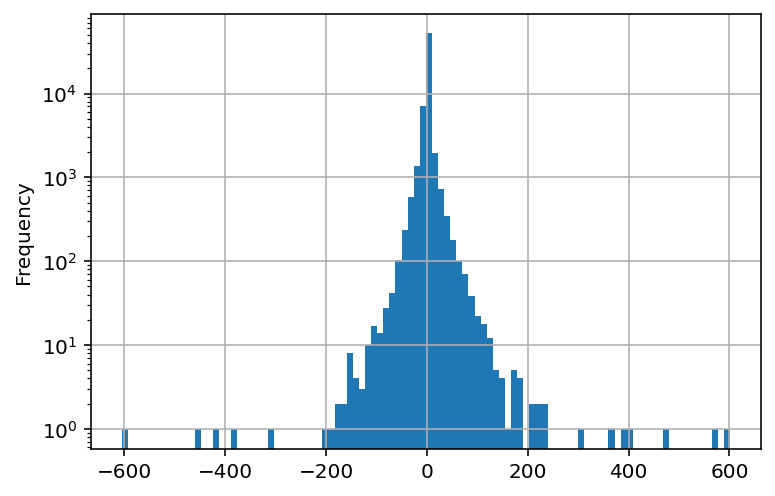

In [65]:
time = player_john["tick"] * sec_per_tick
player_john["dViewY"] = player_john["viewY"].diff() / time.diff()

ax = player_john["dViewY"].plot.hist(bins=100)
ax.set_yscale("log")
ax.grid()

<AxesSubplot:xlabel='tick'>

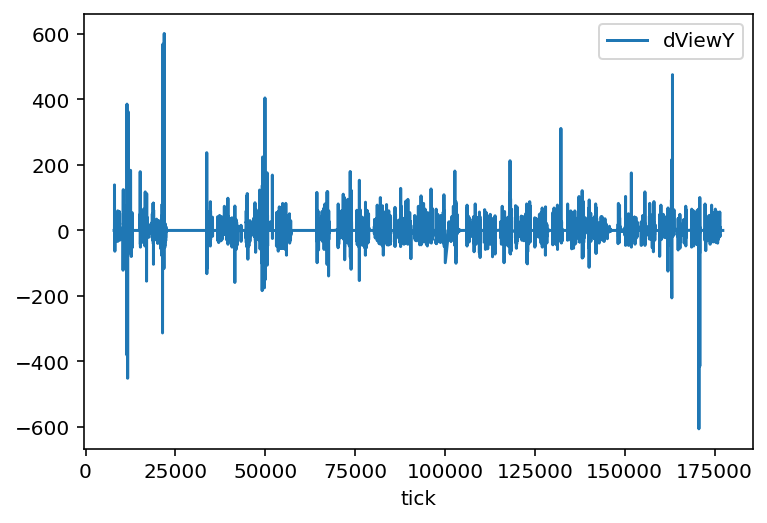

In [66]:
player_john.plot(x="tick", y="dViewY")

<AxesSubplot:xlabel='tick'>

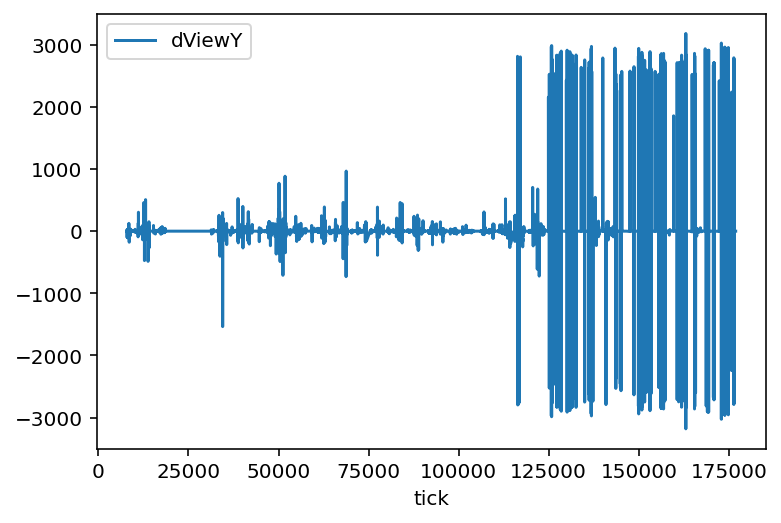

In [67]:
player_sh1ro.plot(x="tick", y="dViewY")

In [77]:
player_sh1ro

,roundNum,tick,seconds,side,teamName,steamID,name,team,x,y,...,cashSpendThisRound,cashSpendTotal,hasHelmet,hasDefuse,hasBomb,ping,zoomLevel,matchID,mapName,dViewY
3,1,7936,0.00000,CT,,76561198362125598,sh1ro,,-1353.000000,645.000000,...,650,650,False,False,False,120,0,003539831729474764830_0420161581,de_cache,NaN
14,1,7938,0.03125,CT,,76561198362125598,sh1ro,,-1353.724365,643.541016,...,650,650,False,False,False,120,0,003539831729474764830_0420161581,de_cache,1.757812
23,1,7940,0.06250,CT,,76561198362125598,sh1ro,,-1354.691040,641.576538,...,650,650,False,False,False,120,0,003539831729474764830_0420161581,de_cache,0.000000
34,1,7942,0.09375,CT,,76561198362125598,sh1ro,,-1356.038696,638.831482,...,650,650,False,False,False,120,0,003539831729474764830_0420161581,de_cache,0.000000
44,1,7944,0.12500,CT,,76561198362125598,sh1ro,,-1356.840942,637.195801,...,650,650,False,False,False,120,0,003539831729474764830_0420161581,de_cache,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665487,30,176878,6.68750,T,,76561198362125598,sh1ro,,-910.574707,1146.972778,...,0,78750,True,False,False,113,1,003539831729474764830_0420161581,de_cache,0.000000
665497,30,176880,6.71875,T,,76561198362125598,sh1ro,,-910.574707,1146.972778,...,0,78750,True,False,False,113,1,003539831729474764830_0420161581,de_cache,0.000000
665506,30,176882,6.75000,T,,76561198362125598,sh1ro,,-910.574707,1146.972778,...,0,78750,True,False,False,113,1,003539831729474764830_0420161581,de_cache,0.000000
665519,30,176884,6.78125,T,,76561198362125598,sh1ro,,-910.574707,1146.972778,...,0,78750,True,False,False,113,1,003539831729474764830_0420161581,de_cache,0.000000


In [83]:
damages = demo.damages

damages_sh1ro = damages[damages["attackerName"] == "sh1ro"]

hits = damages_sh1ro[damages_sh1ro["hpDamageTaken"] > 0].reset_index(drop=True)

hits

,tick,seconds,clockTime,attackerSteamID,attackerName,attackerTeam,attackerSide,attackerX,attackerY,attackerZ,...,hpDamageTaken,armorDamage,armorDamageTaken,hitGroup,isFriendlyFire,distance,zoomLevel,roundNum,matchID,mapName
0,11086,49.21875,01:06,7.656120e+16,sh1ro,,CT,523.692200,170.574402,1613.392700,...,43,0,0,Head,False,487.089914,0.0,1,003539831729474764830_0420161581,de_cache
1,12280,10.09375,00:30,7.656120e+16,sh1ro,,CT,135.175659,-1370.571045,1659.031250,...,16,0,0,Generic,False,54.482553,0.0,1,003539831729474764830_0420161581,de_cache
2,13026,21.75000,00:19,7.656120e+16,sh1ro,,CT,-29.630369,-1258.430664,1659.031250,...,19,9,9,Stomach,False,550.977987,0.0,1,003539831729474764830_0420161581,de_cache
3,13036,21.90625,00:19,7.656120e+16,sh1ro,,CT,-29.630369,-1258.430664,1659.031250,...,19,9,9,Stomach,False,540.334125,0.0,1,003539831729474764830_0420161581,de_cache
4,13048,22.09375,00:18,7.656120e+16,sh1ro,,CT,-33.386242,-1259.118652,1659.031250,...,17,0,0,Head,False,530.431684,0.0,1,003539831729474764830_0420161581,de_cache
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,173840,23.78125,01:32,7.656120e+16,sh1ro,,T,940.732361,155.191467,1613.031250,...,54,0,0,Head,False,1094.684624,1.0,29,003539831729474764830_0420161581,de_cache
100,173856,24.03125,01:31,7.656120e+16,sh1ro,,T,941.683167,158.728775,1613.031250,...,11,0,0,Head,False,1094.302011,1.0,29,003539831729474764830_0420161581,de_cache
101,174826,39.18750,01:16,7.656120e+16,sh1ro,,T,-24.163128,374.471954,1613.067749,...,35,0,0,Stomach,False,1636.187873,1.0,29,003539831729474764830_0420161581,de_cache
102,174842,39.43750,01:16,7.656120e+16,sh1ro,,T,-19.873215,374.459869,1613.067749,...,1,0,0,Chest,False,934.518568,1.0,29,003539831729474764830_0420161581,de_cache


In [89]:
# player_sh1ro.merge(hits["tick"], how="inner", on="tick")

player_sh1ro = player_sh1ro.reset_index(drop=True)

replay_ticks = player_sh1ro["tick"].values
hits_ticks = hits["tick"].values

i, j = np.where((replay_ticks[:, None] > hits_ticks - 4) & (replay_ticks[:, None] < hits_ticks + 4))

hit_frames = player_sh1ro.loc[i, :].reset_index(drop=True)

hit_frames

,roundNum,tick,seconds,side,teamName,steamID,name,team,x,y,...,cashSpendThisRound,cashSpendTotal,hasHelmet,hasDefuse,hasBomb,ping,zoomLevel,matchID,mapName,dViewY
0,1,11084,49.18750,CT,,76561198362125598,sh1ro,,523.692200,170.574402,...,650,650,False,False,False,117,0,003539831729474764830_0420161581,de_cache,1.757812
1,1,11086,49.21875,CT,,76561198362125598,sh1ro,,529.513062,169.992722,...,650,650,False,False,False,117,0,003539831729474764830_0420161581,de_cache,131.308594
2,1,11088,49.25000,CT,,76561198362125598,sh1ro,,532.428955,169.726028,...,650,650,False,False,False,117,0,003539831729474764830_0420161581,de_cache,21.796875
3,1,12278,10.06250,CT,,76561198362125598,sh1ro,,135.175659,-1370.571045,...,650,650,False,False,False,116,0,003539831729474764830_0420161581,de_cache,1.757812
4,1,12280,10.09375,CT,,76561198362125598,sh1ro,,132.472412,-1376.045166,...,650,650,False,False,False,116,0,003539831729474764830_0420161581,de_cache,8.789062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,29,174842,39.43750,T,,76561198362125598,sh1ro,,-18.726320,374.504272,...,300,78750,True,False,True,112,1,003539831729474764830_0420161581,de_cache,-2954.003906
308,29,174844,39.46875,T,,76561198362125598,sh1ro,,-17.579889,374.556030,...,300,78750,True,False,True,112,1,003539831729474764830_0420161581,de_cache,2954.003906
309,29,176448,6.93750,T,,76561198362125598,sh1ro,,-913.513367,1147.098389,...,300,78750,True,False,False,112,1,003539831729474764830_0420161581,de_cache,0.000000
310,30,176450,0.00000,T,,76561198362125598,sh1ro,,-911.225342,1147.000610,...,300,78750,True,False,False,112,1,003539831729474764830_0420161581,de_cache,-2754.316406


<AxesSubplot:xlabel='tick'>

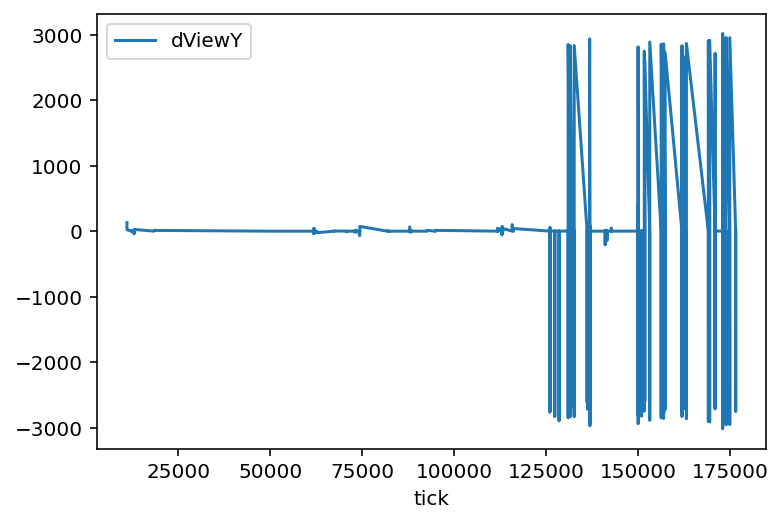

In [91]:
time = hit_frames["tick"] * sec_per_tick
hit_frames["dViewY"] = hit_frames["viewY"].diff() / time.diff()

hit_frames.plot(x="tick", y="dViewY")

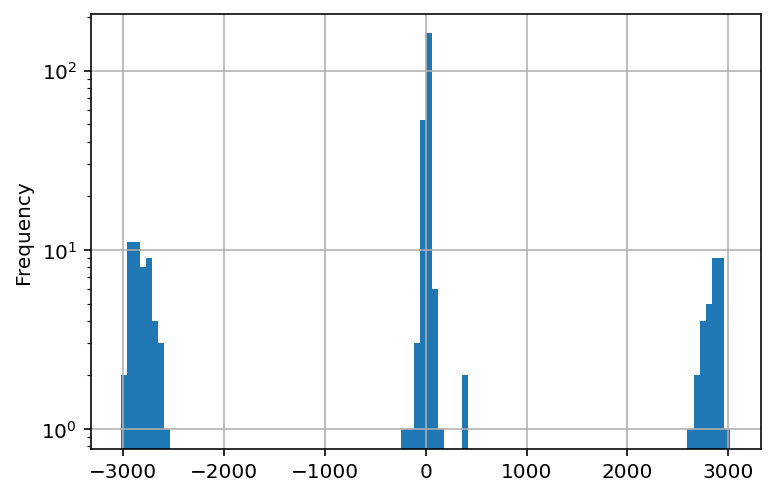

In [94]:
ax = hit_frames["dViewY"].plot.hist(bins=100)
ax.set_yscale("log")
ax.grid()

In [127]:
def find_suspect(damages, replay, name, threshold=50):
    damages = damages[damages["attackerName"] == name]

    hits = damages[(damages["hpDamageTaken"] > threshold) & (~damages["weapon"].isin(GRENADES))].reset_index(drop=True)

    player = replay[replay["name"] == name].reset_index(drop=True)

    player["viewX"] = (player["viewX"] + 180) % 360
    player["viewY"] = (player["viewY"] + 180) % 360

    replay_ticks = player["tick"].values
    hits_ticks = hits["tick"].values

    i, j = np.where((replay_ticks[:, None] > hits_ticks - 4) & (replay_ticks[:, None] < hits_ticks + 4))

    hit_frames = player.loc[i, :].reset_index(drop=True)

    time = hit_frames["tick"] * sec_per_tick
    hit_frames["dViewY"] = hit_frames["viewY"].diff() / time.diff()

    return hit_frames

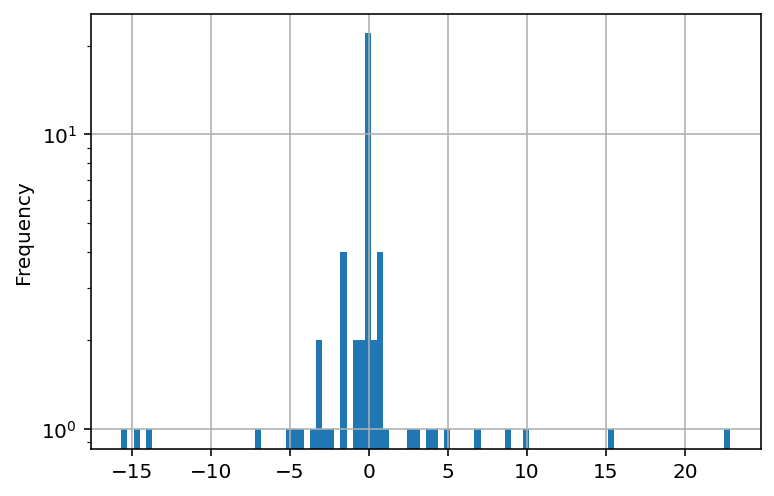

In [128]:
suspect_john = find_suspect(damages, replay, "John Ripper", 80)

ax = suspect_john["dViewY"].plot.hist(bins=100)
ax.set_yscale("log")
ax.grid()

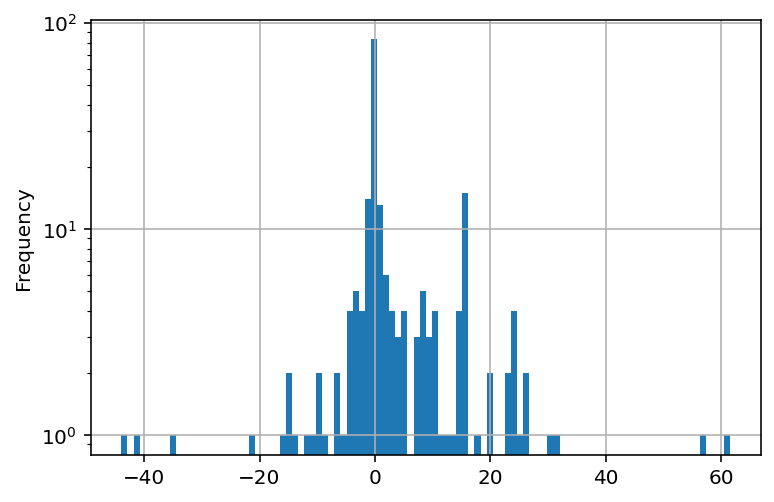

In [129]:
suspect_john = find_suspect(damages, replay, "John Ripper", 0)

ax = suspect_john["dViewY"].plot.hist(bins=100)
ax.set_yscale("log")
ax.grid()

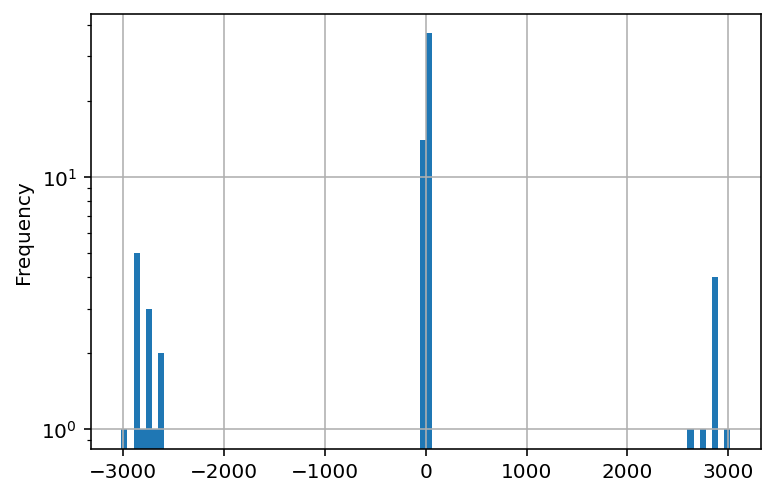

In [130]:
suspect_sh1ro = find_suspect(damages, replay, "sh1ro", 80)
ax = suspect_sh1ro["dViewY"].plot.hist(bins=100)
ax.set_yscale("log")
ax.grid()

In [107]:
replay_my = replay[replay["roundNum"] == 12]
damages_my = demo_my.damages

find_suspect(damages_my, replay_my, "-mblw-")

,roundNum,tick,seconds,side,teamName,steamID,name,team,x,y,...,cashSpendThisRound,cashSpendTotal,hasHelmet,hasDefuse,hasBomb,ping,zoomLevel,matchID,mapName,dViewY
0,12,50539,17.206349,T,,76561199064492045,-mblw-,,-469.509216,-954.929443,...,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train,NaN
1,12,50541,17.238095,T,,76561199064492045,-mblw-,,-470.947632,-956.053101,...,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train,0.000000
2,12,50543,17.269841,T,,76561199064492045,-mblw-,,-472.924072,-957.517517,...,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train,14.589844
3,12,50623,18.539683,T,,76561199064492045,-mblw-,,-457.042816,-1060.307739,...,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train,-17.270508
4,12,50625,18.571429,T,,76561199064492045,-mblw-,,-454.817657,-1060.969238,...,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train,0.000000
5,12,50627,18.603175,T,,76561199064492045,-mblw-,,-453.915771,-1061.711304,...,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train,-1.757812
6,12,51399,2.158730,T,,76561199064492045,-mblw-,,828.428345,-1615.968750,...,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train,1.630758
7,12,51401,2.190476,T,,76561199064492045,-mblw-,,829.742065,-1615.968750,...,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train,3.515625
8,12,51403,2.222222,T,,76561199064492045,-mblw-,,830.649536,-1615.968750,...,800,23550,False,False,False,17,0,match730_003542714992560177238_0804145047_183,de_train,19.335938


,tick,seconds,clockTime,attackerSteamID,attackerName,attackerTeam,attackerSide,attackerX,attackerY,attackerZ,...,hpDamageTaken,armorDamage,armorDamageTaken,hitGroup,isFriendlyFire,distance,zoomLevel,roundNum,matchID,mapName
141,59831,10.50000,01:45,NaN,None,None,None,NaN,NaN,NaN,...,1,0,0,Generic,False,0.000000,NaN,7,003539831729474764830_0420161581,de_cache
177,72963,45.06250,01:10,7.656120e+16,John Ripper,,T,-152.785065,-285.036926,1614.031250,...,1,0,0,Generic,False,913.634473,0.0,9,003539831729474764830_0420161581,de_cache
178,72975,45.25000,01:10,7.656120e+16,John Ripper,,T,-174.354752,-296.125122,1614.031250,...,2,0,0,Generic,False,927.539600,0.0,9,003539831729474764830_0420161581,de_cache
179,72989,45.46875,01:10,7.656120e+16,John Ripper,,T,-165.260971,-295.996033,1614.031250,...,3,0,0,Generic,False,944.156194,0.0,9,003539831729474764830_0420161581,de_cache
180,73001,45.65625,01:10,7.656120e+16,John Ripper,,T,-137.088409,-291.132355,1614.031250,...,4,0,0,Generic,False,957.918024,0.0,9,003539831729474764830_0420161581,de_cache
181,73013,45.84375,01:10,7.656120e+16,John Ripper,,T,-101.886086,-285.481628,1614.031250,...,4,0,0,Generic,False,971.455440,0.0,9,003539831729474764830_0420161581,de_cache
182,73027,46.06250,01:09,7.656120e+16,John Ripper,,T,-58.364334,-281.274323,1614.031250,...,5,0,0,Generic,False,985.770843,0.0,9,003539831729474764830_0420161581,de_cache
183,73039,46.25000,01:09,7.656120e+16,John Ripper,,T,-34.292816,-280.957367,1614.031250,...,6,0,0,Generic,False,1002.424978,0.0,9,003539831729474764830_0420161581,de_cache
188,74285,65.71875,00:50,7.656120e+16,sh1ro,,CT,-194.944519,-599.170593,1613.031250,...,3,0,0,Generic,True,266.172911,0.0,9,003539831729474764830_0420161581,de_cache
189,74297,65.90625,00:50,7.656120e+16,sh1ro,,CT,-155.316574,-605.654175,1613.031250,...,3,0,0,Generic,True,326.377595,0.0,9,003539831729474764830_0420161581,de_cache
